In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rf_train_pred = rf_final_model.predict(X_train_minmax)
xgb_train_pred = xgb_final_model.predict(X_train_minmax)

rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)

rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_final_pred))
rf_test_mae = mean_absolute_error(y_test, rf_final_pred)
rf_test_r2 = r2_score(y_test, rf_final_pred)

xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)
xgb_train_r2 = r2_score(y_train, xgb_train_pred)

xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_final_pred))
xgb_test_mae = mean_absolute_error(y_test, xgb_final_pred)
xgb_test_r2 = r2_score(y_test, xgb_final_pred)

print(f"\n=== PERFORMANCES SUR ENTRAINEMENT ET TEST ===")

# Random Forest
print(f"\nRandom Forest Optimisé (Train):")
print(f"  RMSE: {rf_train_rmse:.2f}")
print(f"  MAE: {rf_train_mae:.2f}")
print(f"  R²: {rf_train_r2:.3f}")

print(f"Random Forest Optimisé (Test):")
print(f"  RMSE: {rf_test_rmse:.2f}")
print(f"  MAE: {rf_test_mae:.2f}")
print(f"  R²: {rf_test_r2:.3f}")

# XGBoost
print(f"\nXGBoost Optimisé (Train):")
print(f"  RMSE: {xgb_train_rmse:.2f}")
print(f"  MAE: {xgb_train_mae:.2f}")
print(f"  R²: {xgb_train_r2:.3f}")

print(f"XGBoost Optimisé (Test):")
print(f"  RMSE: {xgb_test_rmse:.2f}")
print(f"  MAE: {xgb_test_mae:.2f}")
print(f"  R²: {xgb_test_r2:.3f}")

# Calcul des écarts pour détecter le surapprentissage
print(f"\n=== DÉTECTION DU SURAPPRENTISSAGE ===")

# Random Forest
rf_rmse_gap = rf_test_rmse - rf_train_rmse
rf_mae_gap = rf_test_mae - rf_train_mae
rf_r2_gap = rf_train_r2 - rf_test_r2

print(f"\nRandom Forest - Écarts Train vs Test:")
print(f"  RMSE (Test - Train): {rf_rmse_gap:+.2f}")
print(f"  MAE (Test - Train): {rf_mae_gap:+.2f}")
print(f"  R² (Train - Test): {rf_r2_gap:+.3f}")

# XGBoost
xgb_rmse_gap = xgb_test_rmse - xgb_train_rmse
xgb_mae_gap = xgb_test_mae - xgb_train_mae
xgb_r2_gap = xgb_train_r2 - xgb_test_r2

print(f"\nXGBoost - Écarts Train vs Test:")
print(f"  RMSE (Test - Train): {xgb_rmse_gap:+.2f}")
print(f"  MAE (Test - Train): {xgb_mae_gap:+.2f}")
print(f"  R² (Train - Test): {xgb_r2_gap:+.3f}")

# Évaluation du surapprentissage
print(f"\n=== ÉVALUATION DU SURAPPRENTISSAGE ===")

def evaluate_overfitting(rmse_gap, r2_gap, model_name):
    """Évalue le niveau de surapprentissage basé sur les écarts"""
    overfitting_level = "Faible"
    
    if rmse_gap > 1000 or r2_gap > 0.1:
        overfitting_level = "Élevé"
    elif rmse_gap > 500 or r2_gap > 0.05:
        overfitting_level = "Modéré"
    
    return overfitting_level

rf_overfitting = evaluate_overfitting(rf_rmse_gap, rf_r2_gap, "Random Forest")
xgb_overfitting = evaluate_overfitting(xgb_rmse_gap, xgb_r2_gap, "XGBoost")

print(f"\nRandom Forest - Niveau de surapprentissage: {rf_overfitting}")
print(f"XGBoost - Niveau de surapprentissage: {xgb_overfitting}")




=== PERFORMANCES SUR ENTRAINEMENT ET TEST ===

Random Forest Optimisé (Train):
  RMSE: 3118.48
  MAE: 1647.41
  R²: 0.809
Random Forest Optimisé (Test):
  RMSE: 4700.28
  MAE: 2494.45
  R²: 0.621

XGBoost Optimisé (Train):
  RMSE: 3651.09
  MAE: 1901.48
  R²: 0.738
XGBoost Optimisé (Test):
  RMSE: 4555.38
  MAE: 2438.75
  R²: 0.644

=== DÉTECTION DU SURAPPRENTISSAGE ===

Random Forest - Écarts Train vs Test:
  RMSE (Test - Train): +1581.79
  MAE (Test - Train): +847.04
  R² (Train - Test): +0.188

XGBoost - Écarts Train vs Test:
  RMSE (Test - Train): +904.30
  MAE (Test - Train): +537.27
  R² (Train - Test): +0.095

=== ÉVALUATION DU SURAPPRENTISSAGE ===

Random Forest - Niveau de surapprentissage: Élevé
XGBoost - Niveau de surapprentissage: Modéré


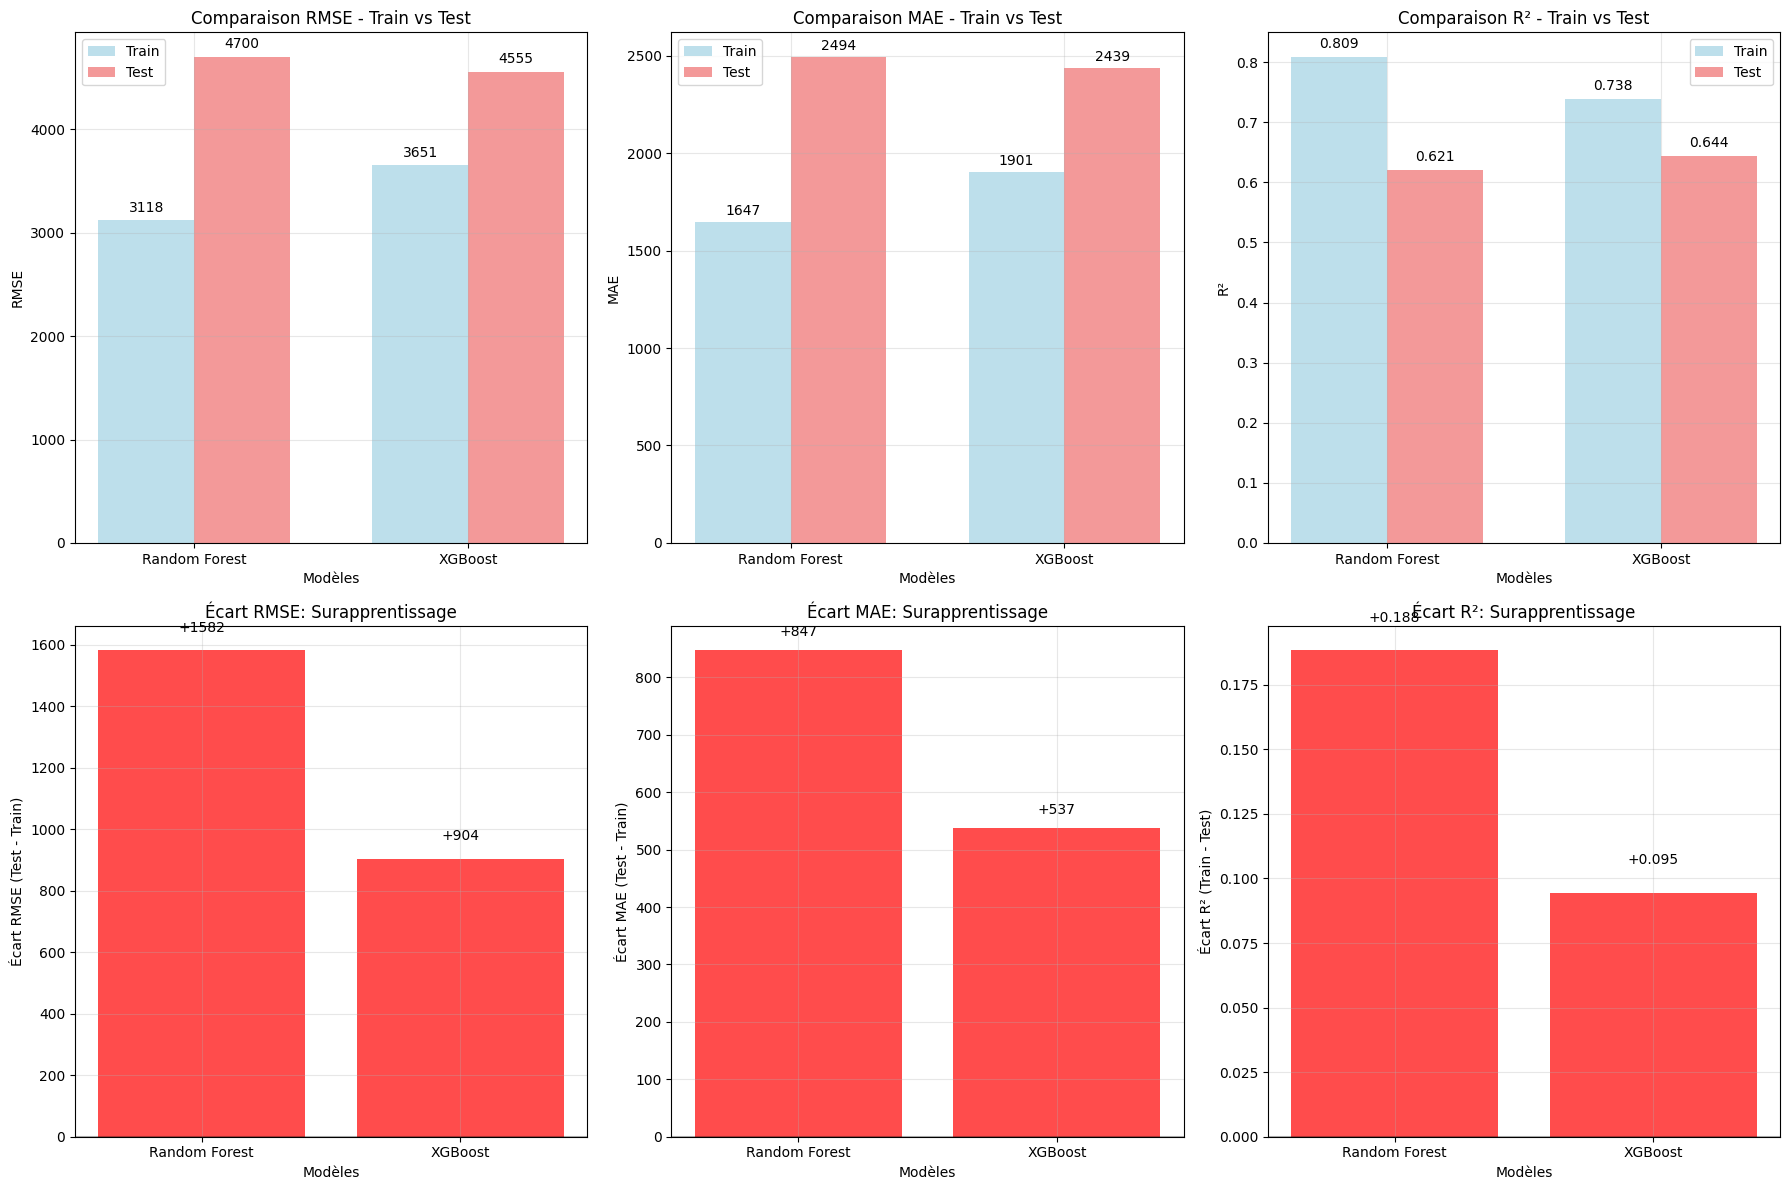


=== RÉSUMÉ DE LA DÉTECTION DU SURAPPRENTISSAGE ===
Légende:
  • Barres rouges dans les écarts = Signes de surapprentissage
  • Barres vertes dans les écarts = Pas de surapprentissage

Critères d'évaluation:
  • RMSE Gap > 500: Surapprentissage modéré
  • RMSE Gap > 1000: Surapprentissage élevé
  • R² Gap > 0.05: Surapprentissage modéré
  • R² Gap > 0.1: Surapprentissage élevé


In [ ]:
# Visualisation de la comparaison Train vs Test
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Données pour les graphiques
models = ['Random Forest', 'XGBoost']
train_rmse = [rf_train_rmse, xgb_train_rmse]
test_rmse = [rf_test_rmse, xgb_test_rmse]
train_mae = [rf_train_mae, xgb_train_mae]
test_mae = [rf_test_mae, xgb_test_mae]
train_r2 = [rf_train_r2, xgb_train_r2]
test_r2 = [rf_test_r2, xgb_test_r2]

x = np.arange(len(models))
width = 0.35

# Graphique RMSE
axes[0, 0].bar(x - width/2, train_rmse, width, label='Train', color='lightblue', alpha=0.8)
axes[0, 0].bar(x + width/2, test_rmse, width, label='Test', color='lightcoral', alpha=0.8)
axes[0, 0].set_xlabel('Modèles')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('Comparaison RMSE - Train vs Test')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (train_val, test_val) in enumerate(zip(train_rmse, test_rmse)):
    axes[0, 0].text(i - width/2, train_val + 50, f'{train_val:.0f}', ha='center', va='bottom')
    axes[0, 0].text(i + width/2, test_val + 50, f'{test_val:.0f}', ha='center', va='bottom')

# Graphique MAE
axes[0, 1].bar(x - width/2, train_mae, width, label='Train', color='lightblue', alpha=0.8)
axes[0, 1].bar(x + width/2, test_mae, width, label='Test', color='lightcoral', alpha=0.8)
axes[0, 1].set_xlabel('Modèles')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Comparaison MAE - Train vs Test')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (train_val, test_val) in enumerate(zip(train_mae, test_mae)):
    axes[0, 1].text(i - width/2, train_val + 20, f'{train_val:.0f}', ha='center', va='bottom')
    axes[0, 1].text(i + width/2, test_val + 20, f'{test_val:.0f}', ha='center', va='bottom')

# Graphique R²
axes[0, 2].bar(x - width/2, train_r2, width, label='Train', color='lightblue', alpha=0.8)
axes[0, 2].bar(x + width/2, test_r2, width, label='Test', color='lightcoral', alpha=0.8)
axes[0, 2].set_xlabel('Modèles')
axes[0, 2].set_ylabel('R²')
axes[0, 2].set_title('Comparaison R² - Train vs Test')
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(models)
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (train_val, test_val) in enumerate(zip(train_r2, test_r2)):
    axes[0, 2].text(i - width/2, train_val + 0.01, f'{train_val:.3f}', ha='center', va='bottom')
    axes[0, 2].text(i + width/2, test_val + 0.01, f'{test_val:.3f}', ha='center', va='bottom')

# Graphiques des écarts (Gap Analysis)
gaps_rmse = [rf_rmse_gap, xgb_rmse_gap]
gaps_mae = [rf_mae_gap, xgb_mae_gap]
gaps_r2 = [rf_r2_gap, xgb_r2_gap]

# Graphique des écarts RMSE
colors_rmse = ['red' if gap > 0 else 'green' for gap in gaps_rmse]
axes[1, 0].bar(models, gaps_rmse, color=colors_rmse, alpha=0.7)
axes[1, 0].set_xlabel('Modèles')
axes[1, 0].set_ylabel('Écart RMSE (Test - Train)')
axes[1, 0].set_title('Écart RMSE: Surapprentissage')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, gap in enumerate(gaps_rmse):
    axes[1, 0].text(i, gap + (50 if gap >= 0 else -50), f'{gap:+.0f}', ha='center', va='bottom' if gap >= 0 else 'top')

# Graphique des écarts MAE
colors_mae = ['red' if gap > 0 else 'green' for gap in gaps_mae]
axes[1, 1].bar(models, gaps_mae, color=colors_mae, alpha=0.7)
axes[1, 1].set_xlabel('Modèles')
axes[1, 1].set_ylabel('Écart MAE (Test - Train)')
axes[1, 1].set_title('Écart MAE: Surapprentissage')
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, gap in enumerate(gaps_mae):
    axes[1, 1].text(i, gap + (20 if gap >= 0 else -20), f'{gap:+.0f}', ha='center', va='bottom' if gap >= 0 else 'top')

# Graphique des écarts R² 
colors_r2 = ['red' if gap > 0 else 'green' for gap in gaps_r2]
axes[1, 2].bar(models, gaps_r2, color=colors_r2, alpha=0.7)
axes[1, 2].set_xlabel('Modèles')
axes[1, 2].set_ylabel('Écart R² (Train - Test)')
axes[1, 2].set_title('Écart R²: Surapprentissage')
axes[1, 2].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 2].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for i, gap in enumerate(gaps_r2):
    axes[1, 2].text(i, gap + (0.01 if gap >= 0 else -0.01), f'{gap:+.3f}', ha='center', va='bottom' if gap >= 0 else 'top')

plt.tight_layout()
plt.show()

# Résumé final
print(f"\n=== RÉSUMÉ DE LA DÉTECTION DU SURAPPRENTISSAGE ===")
print(f"Légende:")
print(f"  • Barres rouges dans les écarts = Signes de surapprentissage")
print(f"  • Barres vertes dans les écarts = Pas de surapprentissage")
print(f"\nCritères d'évaluation:")
print(f"  • RMSE Gap > 500: Surapprentissage modéré")
print(f"  • RMSE Gap > 1000: Surapprentissage élevé") 
print(f"  • R² Gap > 0.05: Surapprentissage modéré")
print(f"  • R² Gap > 0.1: Surapprentissage élevé")